In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
import itertools
import os
import numpy as np
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU's Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPU's Available:  1


In [38]:
filename = 'Dataset//train//Banana//IMG_0114.jpg'

# Loading the Image

**Method-01**

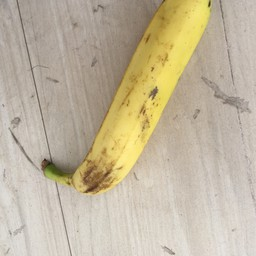

In [39]:
from IPython.display import Image
Image(filename = filename, width=224, height=224)

**Method-02**

In [40]:
from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size = (224,224))

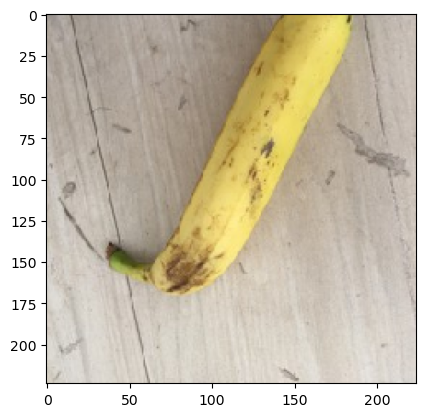

In [41]:
import matplotlib.pyplot as plt
plt.imshow(img)

**Method-03**

In [42]:
import cv2

In [43]:
img = cv2.imread(filename)

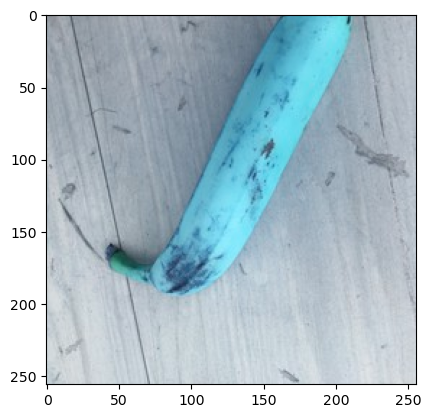

In [44]:
plt.imshow(img) # color is different because it is not RGB it is GBR

In [45]:
imgg = cv2.resize(img, (224,224))

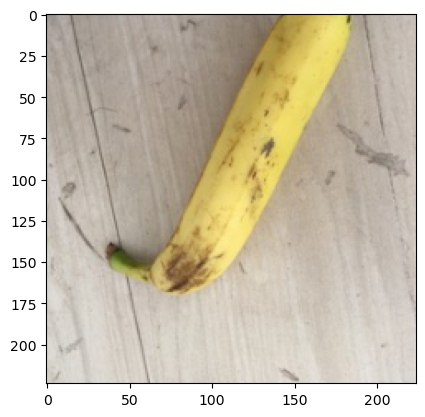

In [46]:
plt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB))

**Method-04**

In [47]:
from PIL import Image
im = Image.open(filename)

In [48]:
im = im.resize((224,224))

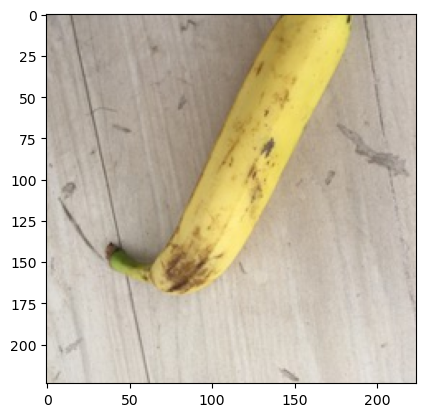

In [49]:
plt.imshow(im)

# Lets load the Deep Learning model

In [50]:
Mobmodel = tf.keras.applications.mobilenet.MobileNet() # Deeplearning model weights - pretrained

# Pre-processing of the image

In [51]:
from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size = (224,224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)

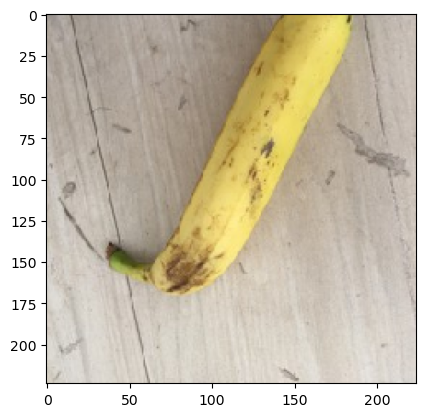

In [52]:
plt.imshow(img)

In [53]:
img_array

array([[[155., 150., 144.],
        [152., 147., 141.],
        [144., 139., 135.],
        ...,
        [197., 188., 181.],
        [195., 186., 179.],
        [198., 189., 182.]],

       [[158., 153., 147.],
        [154., 149., 143.],
        [147., 142., 138.],
        ...,
        [197., 188., 181.],
        [195., 186., 179.],
        [199., 190., 183.]],

       [[162., 155., 149.],
        [159., 152., 146.],
        [155., 148., 142.],
        ...,
        [199., 190., 183.],
        [196., 187., 180.],
        [198., 189., 182.]],

       ...,

       [[224., 218., 206.],
        [210., 204., 192.],
        [216., 210., 198.],
        ...,
        [215., 212., 207.],
        [220., 217., 212.],
        [220., 217., 212.]],

       [[219., 213., 201.],
        [212., 206., 194.],
        [215., 209., 197.],
        ...,
        [215., 212., 207.],
        [220., 217., 212.],
        [221., 218., 213.]],

       [[216., 210., 198.],
        [215., 209., 197.],
        [212., 2

In [54]:
img_array_expanded_dims

array([[[[155., 150., 144.],
         [152., 147., 141.],
         [144., 139., 135.],
         ...,
         [197., 188., 181.],
         [195., 186., 179.],
         [198., 189., 182.]],

        [[158., 153., 147.],
         [154., 149., 143.],
         [147., 142., 138.],
         ...,
         [197., 188., 181.],
         [195., 186., 179.],
         [199., 190., 183.]],

        [[162., 155., 149.],
         [159., 152., 146.],
         [155., 148., 142.],
         ...,
         [199., 190., 183.],
         [196., 187., 180.],
         [198., 189., 182.]],

        ...,

        [[224., 218., 206.],
         [210., 204., 192.],
         [216., 210., 198.],
         ...,
         [215., 212., 207.],
         [220., 217., 212.],
         [220., 217., 212.]],

        [[219., 213., 201.],
         [212., 206., 194.],
         [215., 209., 197.],
         ...,
         [215., 212., 207.],
         [220., 217., 212.],
         [221., 218., 213.]],

        [[216., 210., 198.],
       

In [55]:
img_array_expanded_dims.shape # 3 channels 'RGB'

(1, 224, 224, 3)

In [56]:
final_image = tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [57]:
predictions = Mobmodel.predict(final_image)

1/1 [==============================] - 0s 387ms/step


In [58]:
results = imagenet_utils.decode_predictions(predictions)

In [59]:
print(results)

[[('n07753592', 'banana', 0.7554858), ('n01945685', 'slug', 0.17636836), ('n13040303', 'stinkhorn', 0.04047375), ('n02259212', 'leafhopper', 0.0038922874), ('n13133613', 'ear', 0.0038064003)]]
